# 1. Overview 

We are going to practice data visualisation in Python using EPL data

# 2. Load Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


# 3. Import the data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,Attacker,65.0,4329,12.0,17.1,264,Americas,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,Attacker,50.0,4395,9.5,5.6,167,EU,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,Goalkeeper,7.0,1529,5.5,5.9,134,EU,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,Attacker,20.0,2393,7.5,1.5,122,United Kingdom,United Kingdom,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,Defence,22.0,912,6.0,0.7,121,EU,France,0,4,1,1,0


# 4. Transform the data?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
name            461 non-null object
club            461 non-null object
age             461 non-null int64
position        461 non-null object
position_cat    461 non-null object
market_value    461 non-null float64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null float64
fpl_points      461 non-null int64
region          460 non-null object
nationality     461 non-null object
new_foreign     461 non-null int64
age_cat         461 non-null int64
club_id         461 non-null int64
big_club        461 non-null int64
new_signing     461 non-null int64
dtypes: float64(3), int64(8), object(6)
memory usage: 61.3+ KB


# 5. Quick plot using pandas

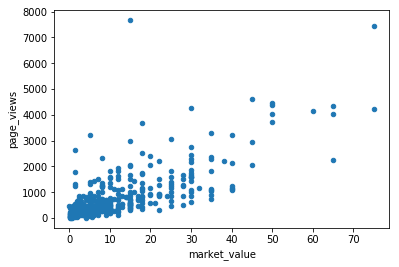

In [7]:
## basic plot using pandas - use the data.plot.scatter(x,y) function
data.plot.scatter('market_value', 'page_views')

# matplotlib

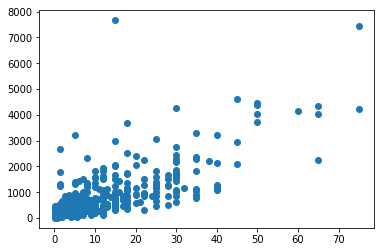

In [14]:
plt.scatter(data.market_value, data.page_views)

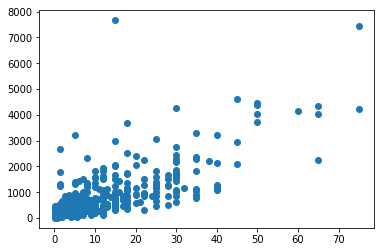

In [16]:
## alternative way of plotting usig the square brackets and speechmarks 
plt.scatter(data['market_value'], data.page_views)

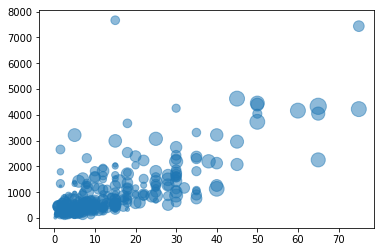

In [19]:
## lets add a third dimension
## s= is the size
## alpha is transparency

plt.scatter(data.market_value, data.page_views, s=data.fpl_points, alpha=0.5,  )

Text(0.5, 1.0, 'English Premier League')

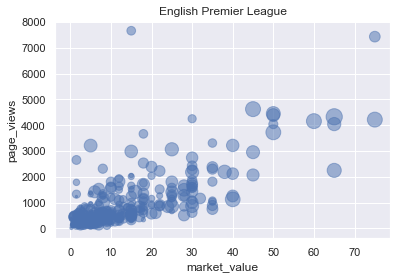

In [62]:
## lets label axis
plt.scatter(data.market_value, data.page_views, s=data.fpl_points, alpha=0.5 )
plt.xlabel('market_value')
plt.ylabel('page_views')
plt.title('English Premier League')

# Seaborn

In [23]:

import seaborn as sns
sns.set() ## this syntax sets sns as default, so now if you plot matplotlib, it will use seaborn underlying functionality

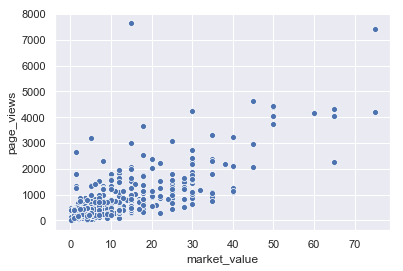

In [24]:
sns.scatterplot(x="market_value",y="page_views",data=data)


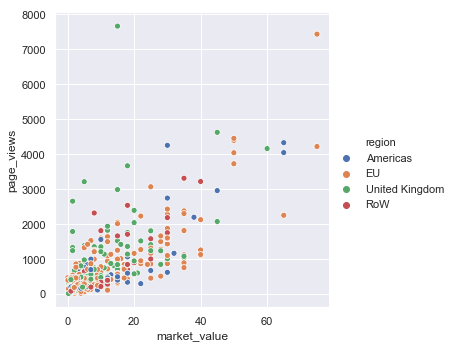

In [26]:
sns.relplot(x="market_value",y="page_views",data=data, hue='region') ## colour is hue

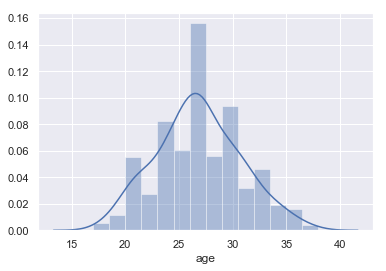

In [30]:
##histogram
sns.distplot(data.age)
plt.show()

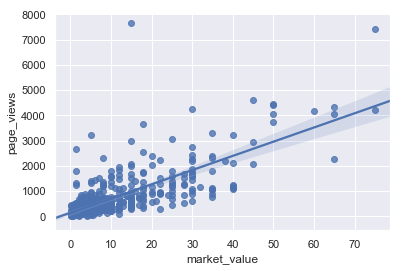

In [31]:
## linear regression
sns.regplot(x='market_value', y='page_views', data=data)

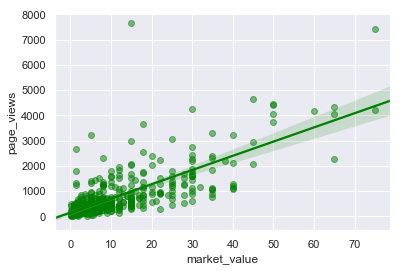

In [37]:
sns.regplot(x="market_value",y="page_views",data=data, color="green",
           scatter_kws={'alpha':0.5})
plt.show()

# Bokeh

###### blurring of photographs!
explore outliers in the data using an interactive plot

In [38]:
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_file, show, output_notebook
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [61]:
# Create a column data source from df
source = ColumnDataSource(data)

#create the figure p
p = figure(plot_width=400, plot_height=400, tools=["hover"], tooltips=[('Name', '@name'),('Market Value','@market_value'),('Page Views','@page_views')], title='English Premier League Data')
,
# add circle_glyphs to the figure
p.circle('market_value', 'page_views', source=source)

show(p)

In [52]:
from bokeh import plotting as bpl
from bokeh import charts as bch
bpl.output_notebook()



ImportError: cannot import name 'charts' from 'bokeh' (T:\Anaconda3\lib\site-packages\bokeh\__init__.py)

In [ ]:
tooltips=[
        ('Market_value', '@market_value'),
        ("page_views", '@page_views')
    ]
scatter = bch.Scatter(data, x='market_value', y='page_views',
                      color='club',
                      legend="top_right",
                      tooltips=tooltips
                     )

bch.show(scatter)

In [57]:
# Create a column data source from df
source = ColumnDataSource(data)

#create the figure p
p = figure(plot_width=400, plot_height=400, tools=["hover"], tooltips=[('Name', '@name'),('Market Value','@market_value'),('Page Views','@page_views')], title='English Premier League Data')
,
# add circle_glyphs to the figure
p.square('market_value', 'page_views', source=source, color='position_cat', legend="top_right")

show(p)

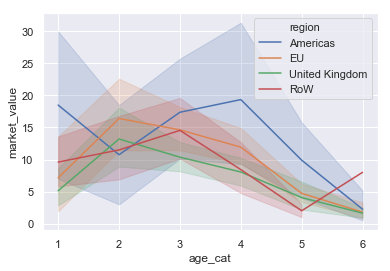

In [68]:

sns.set(style="darkgrid")

# Load an example dataset with long-form data

# Plot the responses for different events and regions
sns.lineplot(y="market_value", x="age_cat",
             hue="region",
             data=data)
plt.show()